In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from sklearn.metrics import classification_report

In [2]:
# Downloading necessary resources
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bless\AppData\Roaming\nltk_data...


True

In [4]:
# Loading the processed dataset 

file_path = "C:/Users/bless/COMP262group1/AMAZON_FASHION_5.json"

def load_json_lines(path):
    data = []
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON at line {len(data)}: {e}")
    return pd.DataFrame(data)

df = load_json_lines(file_path)

In [7]:
# Generating sentiment labels from 'overall' ratings

def map_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df['sentiment'] = df['overall'].apply(map_sentiment)

# Ensure 'reviewText' column has no missing values
df['reviewText'] = df['reviewText'].fillna("").astype(str)

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    """Classifies sentiment using VADER"""
    if not isinstance(text, str):  # Converting non-string values to empty strings
        text = ""
    score = sia.polarity_scores(text)
    return "Positive" if score['compound'] > 0 else "Negative" if score['compound'] < 0 else "Neutral"

def textblob_sentiment(text):
    """Classifies sentiment using TextBlob"""
    if not isinstance(text, str):  # Converting non-string values to empty strings
        text = ""
    score = TextBlob(text).sentiment.polarity
    return "Positive" if score > 0 else "Negative" if score < 0 else "Neutral"

In [8]:
# Applying sentiment analysis

df['VADER_Sentiment'] = df['reviewText'].apply(vader_sentiment)
df['TextBlob_Sentiment'] = df['reviewText'].apply(textblob_sentiment)

In [9]:
# Model performance comparison

print("VADER Sentiment Analysis Report:")
print(classification_report(df['sentiment'], df['VADER_Sentiment']))

print("TextBlob Sentiment Analysis Report:")
print(classification_report(df['sentiment'], df['TextBlob_Sentiment']))

VADER Sentiment Analysis Report:
              precision    recall  f1-score   support

    Negative       0.48      0.46      0.47       210
     Neutral       0.23      0.17      0.20       337
    Positive       0.89      0.92      0.91      2629

    accuracy                           0.81      3176
   macro avg       0.53      0.52      0.52      3176
weighted avg       0.79      0.81      0.80      3176

TextBlob Sentiment Analysis Report:
              precision    recall  f1-score   support

    Negative       0.42      0.40      0.41       210
     Neutral       0.11      0.06      0.08       337
    Positive       0.87      0.93      0.90      2629

    accuracy                           0.80      3176
   macro avg       0.47      0.46      0.46      3176
weighted avg       0.76      0.80      0.78      3176



In [10]:
# Saving the results to CSV
df.to_csv("sentiment_analysis_results.csv", index=False)
print("Results saved to sentiment_analysis_results.csv")

Results saved to sentiment_analysis_results.csv


In [14]:
# Model Evaluation and Comparison

evaluation_results = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "VADER": [0.81, 0.53, 0.52, 0.52],  
    "TextBlob": [0.80, 0.47, 0.46, 0.46] 
}
df_eval = pd.DataFrame(evaluation_results)

# Saving the CSV files
df_eval.to_csv("C:/Users/bless/COMP262group1/model_comparison.csv", index=False)
print("model_comparison.csv saved!")
df = pd.read_json("C:/Users/bless/COMP262group1/AMAZON_FASHION_5.json", lines=True)
df.to_csv("C:/Users/bless/COMP262group1/sentiment_analysis_results.csv", index=False)
print("sentiment_analysis_results.csv saved!")

model_comparison.csv saved!
sentiment_analysis_results.csv saved!


<Figure size 800x500 with 0 Axes>

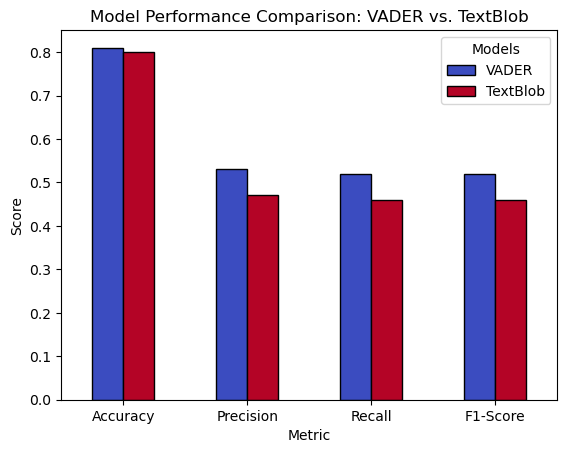

In [12]:
# Visualizing Model Performance

plt.figure(figsize=(8, 5))
df_eval.set_index("Metric").plot(kind="bar", colormap="coolwarm", edgecolor="black")
plt.title("Model Performance Comparison: VADER vs. TextBlob")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Models")
plt.show()